Reads in Wally processing and adds it to the Mtimes and .dat file

In [91]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, '/data/MoodGroup/actigraphy/gavi/actigraPy') 

import actigraPy.actigraPy as act
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [109]:
sub = '101'
sub_long='sub-MOA'+sub
datfn = '/data/MoodGroup/actigraphy/KMOA/derivatives/preproc/%s/%s_dat.csv'%(sub_long,sub_long)
wallyfile = '/data/MoodGroup/actigraphy/KMOA/derivatives/old_proc/%s/%s_processed.csv'%(sub_long,sub)
dbfile = '/data/MoodGroup/actigraphy/KMOA/KMOA_summary.csv'
out_dir = '/data/MoodGroup/actigraphy/KMOA/derivatives/preproc/%s'%sub_long
data_dir = '/data/MoodGroup/actigraphy/KMOA/raw/%s'%sub_long 


In [176]:
datfile = pd.read_csv(datfn)
wally = pd.read_csv(wallyfile)
dat = pd.read_csv(dbfile)
Mtimes=pd.read_csv(os.path.join(out_dir,'%s_Mtimes_edit.csv'%sub_long))


In [234]:
logs=[os.path.join(data_dir,'%s_sleeplog.csv'%sub_long),os.path.join(data_dir,'%s_calendar_log.xls'%sub_long)]


Get infusion time

In [182]:
infusion=dat['infusion'].loc[dat['sub_no']==int(sub)]
dt= datetime.strptime(ket,'%d-%b-%y')
dt

datetime.datetime(2011, 10, 27, 0, 0)

In [158]:
"""inf_type = dat['drug'].loc[dat['sub_no']==int(sub)]
idx = abs((int(inf_type))-1)
ket =Mtimes['OffDate'].loc[Mtimes['Comment']=='Infusion'].iloc[idx]
dt= datetime.strptime(ket,'%d-%b-%y')
dt"""

datetime.datetime(2011, 10, 27, 0, 0)

In [183]:
td_list= []
for row in wally.iterrows():
    time_list = row[1]['time'].split(':')
    for idx,time in enumerate(time_list):
        if len(time)>2:
            time_list[idx]=time[-2:]
    day = row[1]['day']
    tmp= timedelta(days=day,hours=int(time_list[0]),minutes=int(time_list[1]))
    td_list.append(tmp)

In [184]:
dtfmt='%d-%b-%y %I:%M %p'
dt_list=(np.array(td_list)+dt)
wally['DateTime'] = [x.strftime(dtfmt) for x in dt_list]

In [185]:
#now make a mask from wally data
wally['w']=wally['activity'].isna().astype(int).tolist()

In [187]:
wally_proc=wally[['DateTime','w']]

In [188]:
datfile=datfile.merge(wally_proc,how='left',on='DateTime')

In [189]:
datfile['dt']=[datetime.strptime(x,dtfmt) for x in datfile['DateTime']]

In [190]:
datfile=datfile.sort_values(by='dt')
datfile.pop('dt');

In [191]:
datfile

DateTime  activity   M  cal  g  pass  z    w
0      25-Oct-11 11:14 AM       457 NaN    0  0     0  0  0.0
1      25-Oct-11 11:15 AM       429 NaN    0  0     0  0  0.0
2      25-Oct-11 11:16 AM       472 NaN    0  0     0  0  0.0
3      25-Oct-11 11:17 AM       200 NaN    0  0     0  0  0.0
4      25-Oct-11 11:18 AM       610 NaN    0  0     0  0  0.0
5      25-Oct-11 11:19 AM       693 NaN    0  0     0  0  0.0
6      25-Oct-11 11:20 AM       289 NaN    0  0     0  0  0.0
7      25-Oct-11 11:21 AM       207 NaN    0  0     0  0  0.0
8      25-Oct-11 11:22 AM       186 NaN    0  0     0  0  0.0
9      25-Oct-11 11:23 AM       109 NaN    0  0     0  0  0.0
10     25-Oct-11 11:24 AM       163 NaN    0  0     0  0  0.0
11     25-Oct-11 11:25 AM         0 NaN    0  0     0  0  0.0
12     25-Oct-11 11:26 AM        43 NaN    0  0     0  0  0.0
13     25-Oct-11 11:27 AM        66 NaN    0  0     0  0  0.0
14     25-Oct-11 11:28 AM       221 NaN    0  0     0  0  0.0
15     25-Oct-11 11:29 AM         0 NaN    0  0     0  0  0.0
16     25-Oct-11 11:30 AM         0 NaN    0  0     0  0  0.0
17     25-Oct-11 11:31 AM       214 NaN    0  0     0  0  0.0
18     25-Oct-11 11:32 AM       105 NaN    0  0     0  0  0.0
19     25-Oct-11 11:33 AM       244 NaN    0  0     0  0  0.0
20     25-Oct-11 11:34 AM       109 NaN    0  0     0  0  0.0
21     25-Oct-11 11:35 AM       352 NaN    0  0     0  0  0.0
22     25-Oct-11 11:36 AM       429 NaN    0  0     0  0  0.0
23     25-Oct-11 11:37 AM       229 NaN    0  0     0  0  0.0
24     25-Oct-11 11:38 AM         0 NaN    0  0     0  0  0.0
25     25-Oct-11 11:39 AM         0 NaN    0  0     0  1  0.0
26     25-Oct-11 11:40 AM         0 NaN    0  0     0  1  0.0
27     25-Oct-11 11:41 AM         0 NaN    0  0     0  1  0.0
28     25-Oct-11 11:42 AM         9 NaN    0  0     0  1  0.0
29     25-Oct-11 11:43 AM         0 NaN    0  0     0  1  0.0
...                   ...       ...  ..  ... ..   ... ..  ...
65379  09-Dec-11 08:51 PM         0 NaN    0  0     0  0  NaN
65380  09-Dec-11 08:52 PM         0 NaN    0  0     0  0  NaN
65381  09-Dec-11 08:53 PM         0 NaN    0  0     0  0  NaN
65382  09-Dec-11 08:54 PM         0 NaN    0  0     0  0  NaN
65383  09-Dec-11 08:55 PM         0 NaN    0  0     0  0  NaN
65384  09-Dec-11 08:56 PM         0 NaN    0  0     0  0  NaN
65385  09-Dec-11 08:57 PM         0 NaN    0  0     0  0  NaN
65386  09-Dec-11 08:58 PM         0 NaN    0  0     0  0  NaN
65387  09-Dec-11 08:59 PM         0 NaN    0  0     0  0  NaN
65388  09-Dec-11 09:00 PM         0 NaN    0  0     0  0  NaN
65389  09-Dec-11 09:01 PM         0 NaN    0  0     0  0  NaN
65390  09-Dec-11 09:02 PM         0 NaN    0  0     0  0  NaN
65391  09-Dec-11 09:03 PM         0 NaN    0  0     0  0  NaN
65392  09-Dec-11 09:04 PM         0 NaN    0  0     0  0  NaN
65393  09-Dec-11 09:05 PM         0 NaN    0  0     0  0  NaN
65394  09-Dec-11 09:06 PM         0 NaN    0  0     0  0  NaN
65395  09-Dec-11 09:07 PM         0 NaN    0  0     0  0  NaN
65396  09-Dec-11 09:08 PM         0 NaN    0  0     0  0  NaN
65397  09-Dec-11 09:09 PM         0 NaN    0  0     0  0  NaN
65398  09-Dec-11 09:10 PM         0 NaN    0  0     0  0  NaN
65399  09-Dec-11 09:11 PM         0 NaN    0  0     0  0  NaN
65400  09-Dec-11 09:12 PM         0 NaN    0  0     0  0  NaN
65401  09-Dec-11 09:13 PM         0 NaN    0  0     0  0  NaN
65402  09-Dec-11 09:14 PM         0 NaN    0  0     0  0  NaN
65403  09-Dec-11 09:15 PM         0 NaN    0  0     0  0  NaN
65404  09-Dec-11 09:16 PM         0 NaN    0  0     0  0  NaN
65405  09-Dec-11 09:17 PM         0 NaN    0  0     0  0  NaN
65406  09-Dec-11 09:18 PM         0 NaN    0  0     0  0  NaN
65407  09-Dec-11 09:19 PM         0 NaN    0  0     0  0  NaN
65408  09-Dec-11 09:20 PM         0 NaN    0  0     0  0  NaN

[65409 rows x 8 columns]

In [192]:
datfile.to_csv(datfn)

### Make Mtimes file - go to read_Mtimes!!

In [223]:
#ok now we need to find transition points
mk_w = []
past_num = 0 
for idx,num in enumerate(datfile['w'].tolist()):
    if not np.isnan(num):
        if past_num != num:
            mk_w.append(idx)
    past_num=num

In [224]:
left=mk_w[0::2]
right=mk_w[1::2]
if len(left)-len(right) == 1:
    right.append(datfile.index.values[-1]-2)

In [225]:
zipped = zip(left,right,['']*len(left))
w_mks=list(zipped)

In [226]:
awd_fn = os.path.join(data_dir,'%s.AWD'%sub_long)
awd_dat=act.read_AWD(awd_fn)
log_dat,kw_dat = act.read_log(os.path.join(out_dir,'%s_Mtimes_edit.csv'%sub_long),awd_dat)
mk_idx=log_dat['mks']

     Unnamed: 0    OffDate   OffTime     OnDate    OnTime marker      Comment
0             0  25-Oct-11  11:39 AM  25-Oct-11  11:53 AM      z             
1             1  25-Oct-11  12:19 PM  25-Oct-11  12:41 PM      z             
2             2  25-Oct-11  12:55 PM  25-Oct-11  03:03 PM      g           3T
3             2  25-Oct-11  12:55 PM  25-Oct-11  03:03 PM      z             
4             3  25-Oct-11  01:00 PM  25-Oct-11  03:00 PM    cal           3T
5             4  25-Oct-11  06:15 PM  25-Oct-11  06:35 PM      z             
6             5  25-Oct-11  06:41 PM  25-Oct-11  06:55 PM      z             
7             6  25-Oct-11  09:09 PM  25-Oct-11  09:23 PM      z             
8             7  25-Oct-11  09:30 PM  26-Oct-11  07:00 AM    cal  Sleep study
9             8  25-Oct-11  09:41 PM  25-Oct-11  09:55 PM      z             
10            9  25-Oct-11  10:11 PM  25-Oct-11  10:37 PM      z             
11           10  25-Oct-11  10:45 PM  25-Oct-11  11:21 PM      z

In [227]:
mk_idx['w']=w_mks

In [228]:
dt_fmt = "%d-%b-%y %I:%M %p"
mk_list = []

for mm in mk_idx.keys():
    if mm != 'M':
        for tup in mk_idx[mm]:
            mk_list.append(tup+(mm,))
mk_list.sort()

In [230]:
act.write_Mtimes(awd_dat,mk_idx,'_Mtimes_edit+wp.csv')
   

OnDate    OnTime    OffDate   OffTime marker      Comment
0    25-Oct-11  11:53 AM  25-Oct-11  11:39 AM      z             
1    25-Oct-11  12:41 PM  25-Oct-11  12:19 PM      z             
2    25-Oct-11  03:04 PM  25-Oct-11  12:54 PM      w             
3    25-Oct-11  03:03 PM  25-Oct-11  12:55 PM      z             
4    25-Oct-11  03:03 PM  25-Oct-11  12:55 PM      g           3T
5    25-Oct-11  03:00 PM  25-Oct-11  01:00 PM    cal           3T
6    25-Oct-11  06:35 PM  25-Oct-11  06:15 PM      z             
7    25-Oct-11  06:55 PM  25-Oct-11  06:41 PM      z             
8    25-Oct-11  09:23 PM  25-Oct-11  09:09 PM      z             
9    26-Oct-11  07:00 AM  25-Oct-11  09:30 PM    cal  Sleep study
10   25-Oct-11  09:55 PM  25-Oct-11  09:41 PM      z             
11   25-Oct-11  10:37 PM  25-Oct-11  10:11 PM      z             
12   25-Oct-11  11:21 PM  25-Oct-11  10:45 PM      z             
13   26-Oct-11  04:21 AM  25-Oct-11  11:39 PM      z             
14   26-Oct-11  06:23 AM  26-Oct-11  04:25 AM      z             
15   26-Oct-11  07:02 AM  26-Oct-11  06:38 AM      w             
16   26-Oct-11  07:01 AM  26-Oct-11  06:39 AM      z             
17   26-Oct-11  07:29 AM  26-Oct-11  07:15 AM      z             
18   26-Oct-11  08:45 AM  26-Oct-11  08:03 AM      z             
19   26-Oct-11  09:23 AM  26-Oct-11  09:03 AM      z             
20   26-Oct-11  01:53 PM  26-Oct-11  01:34 PM      w             
21   26-Oct-11  01:51 PM  26-Oct-11  01:35 PM      z             
22   26-Oct-11  04:00 PM  26-Oct-11  02:00 PM    cal          MEG
23   26-Oct-11  03:45 PM  26-Oct-11  02:04 PM      w             
24   26-Oct-11  03:43 PM  26-Oct-11  02:05 PM      z             
25   26-Oct-11  03:43 PM  26-Oct-11  02:05 PM      g           3T
26   26-Oct-11  07:20 PM  26-Oct-11  05:36 PM   pass      On pass
27   26-Oct-11  07:59 PM  26-Oct-11  07:41 PM      z             
28   27-Oct-11  07:00 AM  26-Oct-11  09:30 PM    cal  Sleep study
29   26-Oct-11  10:57 PM  26-Oct-11  10:37 PM      z             
..         ...       ...        ...       ...    ...          ...
322  22-Nov-11  03:29 AM  22-Nov-11  02:59 AM      z             
323  22-Nov-11  04:43 AM  22-Nov-11  03:35 AM      z             
324  22-Nov-11  05:55 AM  22-Nov-11  04:49 AM      z             
325  22-Nov-11  07:35 AM  22-Nov-11  05:59 AM      z             
326  22-Nov-11  08:29 AM  22-Nov-11  08:15 AM      z             
327  22-Nov-11  09:15 AM  22-Nov-11  08:47 AM      z             
328  22-Nov-11  10:13 AM  22-Nov-11  10:01 AM      z             
329  22-Nov-11  10:35 AM  22-Nov-11  10:19 AM      z             
330  22-Nov-11  11:25 AM  22-Nov-11  11:13 AM      z             
331  22-Nov-11  11:57 AM  22-Nov-11  11:37 AM      z             
332  22-Nov-11  03:00 PM  22-Nov-11  01:00 PM    cal           3T
333  22-Nov-11  03:43 PM  22-Nov-11  02:11 PM      z             
334  22-Nov-11  05:27 PM  22-Nov-11  02:11 PM      g             
335  22-Nov-11  03:47 PM  22-Nov-11  02:12 PM      w             
336  22-Nov-11  05:00 PM  22-Nov-11  03:00 PM    cal          MEG
337  22-Nov-11  05:27 PM  22-Nov-11  03:53 PM      z             
338  22-Nov-11  05:30 PM  22-Nov-11  04:00 PM      w             
339  23-Nov-11  06:16 AM  22-Nov-11  04:37 PM   pass      On pass
340  22-Nov-11  06:31 PM  22-Nov-11  06:13 PM      z             
341  22-Nov-11  08:47 PM  22-Nov-11  08:01 PM      z             
342  22-Nov-11  10:25 PM  22-Nov-11  10:13 PM      z             
343  22-Nov-11  11:57 PM  22-Nov-11  11:37 PM      z             
344  23-Nov-11  06:03 AM  23-Nov-11  12:57 AM      z             
345  23-Nov-11  07:15 AM  23-Nov-11  06:57 AM      z             
346  23-Nov-11  08:03 AM  23-Nov-11  07:19 AM      z             
347  23-Nov-11  09:33 AM  23-Nov-11  08:13 AM      z             
348  23-Nov-11  10:05 AM  23-Nov-11  09:51 AM      z             
349  23-Nov-11  11:43 AM  23-Nov-11  10:39 AM      z             
350  09-Dec-11  09:20 PM  23-Nov-11  11:57 AM   

## Do some graphing!

In [236]:
#read AWD file
awd_dat = act.read_AWD(awd_fn)
idx={'start':[0],'end':[len(awd_dat['dt_list'])-1]}
#get the start and stops from each log if they exist
for log in logs:
    if os.path.exists(log):
        print(log)
        _, kw_dat = act.read_log(log,awd_dat)

        if 'watch_on' in kw_dat.keys():
            on_date = kw_dat['watch_on'].iloc[0]['OnDate']
            on_time = kw_dat['watch_on'].iloc[0]['OnTime']
            on = datetime(on_date.year,on_date.month,on_date.day,on_time.hour,on_time.minute)
            #check if that time is in dt_list:
            if awd_dat['dt_list'].count(on) > 0:
                on_idx=awd_dat['dt_list'].index(on)
                idx['start'].append(on_idx)

        if 'watch_off' in kw_dat.keys():
            off_date = kw_dat['watch_off'].iloc[0]['OffDate']
            off_time = kw_dat['watch_off'].iloc[0]['OffTime']
            off = datetime(off_date.year,off_date.month,off_date.day,off_time.hour,off_time.minute)
            if awd_dat['dt_list'].count(off) > 0:
                off_idx=awd_dat['dt_list'].index(off)
                idx['end'].append(off_idx)
idx

/data/MoodGroup/actigraphy/KMOA/raw/sub-MOA101/sub-MOA101_calendar_log.xls
      OffDate   OffTime     OnDate    OnTime                         Comment
0         NaT       NaN 2011-10-25  11:00:00                           start
1  2011-10-25  13:00:00 2011-10-25  15:00:00                              3T
2  2011-10-25  21:30:00 2011-10-26  07:00:00                     Sleep study
3  2011-10-26  14:00:00 2011-10-26  16:00:00                             MEG
4  2011-10-26  21:30:00 2011-10-27  07:00:00                     Sleep study
5  2011-10-27  09:00:00 2011-10-27  09:40:00                        Infusion
6  2011-10-27  15:00:00 2011-10-27  17:00:00                             MEG
7  2011-10-27  21:30:00 2011-10-28  07:00:00                     Sleep study
8  2011-10-28  11:00:00 2011-10-28  13:00:00                   7T (canceled)
9  2011-10-29  12:00:00 2011-10-29  14:00:00                              3T
10 2011-11-07  11:00:00 2011-11-07  13:00:00                   7T (canceled)
1

{'start': [0], 'end': [65406, 41776]}

In [237]:
start = max(idx['start'])
end = min(idx['end'])
print('start = %d, end = %d'%(start,end))

start = 0, end = 41776


In [238]:
#put own number in start + end if disagree with above!
lim = [(awd_dat['DateTime'][start],awd_dat['DateTime'][end],"")]
clip_dat = act.clip_dat(lim,awd_dat)

In [ ]:
log_dat,kw_dat=act.read_log(os.path.join(out_dir,'%s_Mtimes_wp.csv'%sub_long))

30
25-Oct-11
0 765
input 0 [-101, 229]
plot this [-101, 229]
input 1 [-100, 230]
plot this [-100, 230]
[0]
26-Oct-11
766 2205
input 0 [-1611, 1709]
plot this [-1611, 1709]
input 1 [-1164, 1188, -1580, 1599, -1610, 1711]
plot this [-1164, 1188, -1580, 1599, -1610, 1711]
[1]
27-Oct-11
2206 3645
input 0 [-2791, 2861, -3111, 3211]
plot this [-2791, 2861, -3111, 3211]
input 1 [-3111, 3211]
plot this [-3111, 3211]
[2 3]
28-Oct-11
3646 5085
input 0 []
input 1 [-4408, 4420]
plot this [-4408, 4420]
[]
29-Oct-11
5086 6525
input 0 [-5815, 5923]
plot this [-5815, 5923]
input 1 [-5815, 5925]
plot this [-5815, 5925]
[4]
30-Oct-11
6526 7965
input 0 [-7309, 7379]
plot this [-7309, 7379]
input 1 []
[5]
31-Oct-11
7966 9405
input 0 []
input 1 []
[]
01-Nov-11
9406 10845
input 0 []
input 1 [-10429, 10443]
plot this [-10429, 10443]
[]
02-Nov-11
10846 12285
input 0 []
input 1 []
[]
03-Nov-11
12286 13725
input 0 [-13187, 13211]
plot this [-13187, 13211]
input 1 []
[6]
04-Nov-11
13726 15165
input 0 []
input 1 

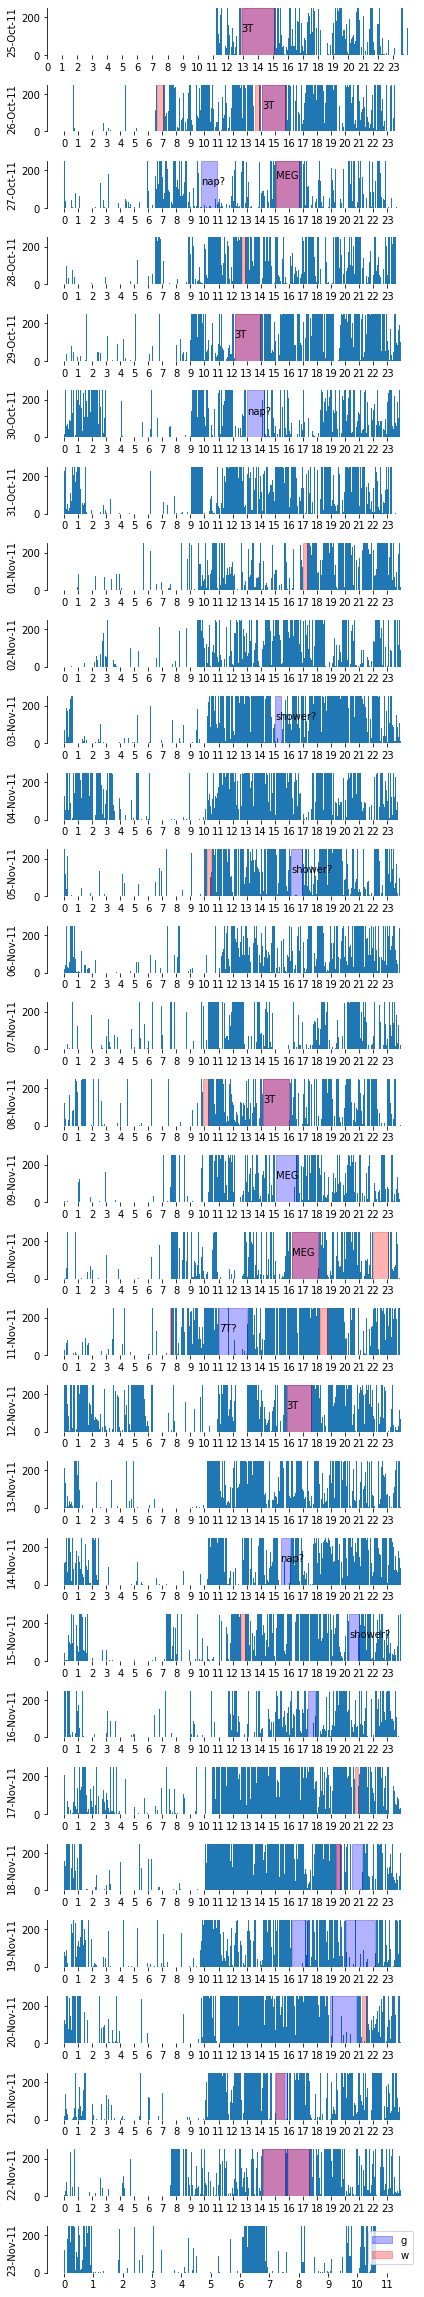

In [125]:
importlib.reload(act)

act.plot_awd(clip_dat,{'g':mk_idx['g'],'w':mk_idx['w']},max_act=250,show=False,fn_pref=os.path.join(out_dir,sub+'_M+proc+wally'),plot_type='single',debug=True)
